In [71]:
import pandas as pd

# 데이터 읽어오기
CH4 = pd.read_csv('data/ch4.csv')
CH4.head()

,Entity,Code,Year,Total including LUCF
0,Afghanistan,AFG,1990,6.740000e+06
1,Afghanistan,AFG,1991,7.020000e+06
2,Afghanistan,AFG,1992,7.130000e+06
3,Afghanistan,AFG,1993,7.210000e+06
4,Afghanistan,AFG,1994,7.470000e+06


In [72]:
# 필요한 데이터만 받기
CH4 = CH4.loc[CH4['Entity'] == 'World', ['Year', 'Total including LUCF']]
CH4.head()

,Year,Total including LUCF
6030,1990,6.909030e+09
6031,1991,6.918610e+09
6032,1992,6.895230e+09
6033,1993,6.914180e+09
6034,1994,6.958840e+09


In [73]:
# 데이터 리네임
CH4.rename(columns = {'Total including LUCF' : 'CH4'}, inplace=True)
# index reset
CH4.reset_index(drop=True, inplace=True)


<Figure size 7000x500 with 0 Axes>

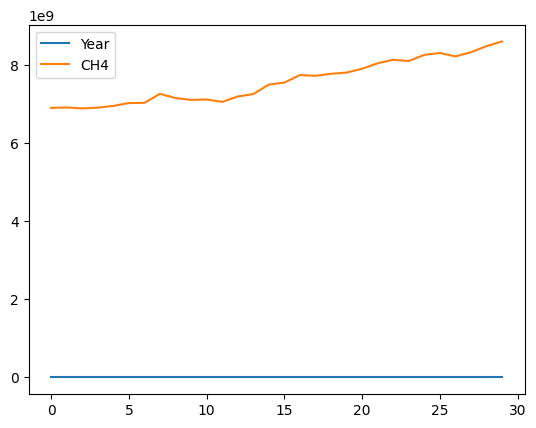

In [74]:
import matplotlib.pyplot as plt

plt.figure(figsize=(70,5))
CH4.plot()
plt.show()

In [75]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression

x = CH4[['Year']]
y = CH4['CH4'].values



In [76]:
print(x, y)

    Year
0   1990
1   1991
2   1992
3   1993
4   1994
5   1995
6   1996
7   1997
8   1998
9   1999
10  2000
11  2001
12  2002
13  2003
14  2004
15  2005
16  2006
17  2007
18  2008
19  2009
20  2010
21  2011
22  2012
23  2013
24  2014
25  2015
26  2016
27  2017
28  2018
29  2019 [6.90902979e+09 6.91860986e+09 6.89522998e+09 6.91418018e+09
 6.95883984e+09 7.03208984e+09 7.03710986e+09 7.26860010e+09
 7.15987012e+09 7.11204004e+09 7.12400000e+09 7.06272021e+09
 7.19960010e+09 7.26250977e+09 7.50518018e+09 7.55627979e+09
 7.74995020e+09 7.72995996e+09 7.78222021e+09 7.81291016e+09
 7.90987988e+09 8.05043018e+09 8.14110986e+09 8.10929980e+09
 8.26680957e+09 8.31591016e+09 8.22717969e+09 8.33340039e+09
 8.48996973e+09 8.60991992e+09]


In [77]:
lr = LinearRegression(fit_intercept=True)
lr.fit(x,y)

LinearRegression()

In [78]:
print('절편 :', lr.intercept_)
print('회귀 계수 :', lr.coef_)


절편 : -115914540437.90697
회귀 계수 : [61609396.39964543]


In [79]:
import numpy as np

# 전년도 까지 데이터 확보
# X_test = np.array([[2020], [2021]])

# 2050년 까지 데이터 확보
X_test = np.array([[i] for i in range(2020, 2031)])
result = list(lr.predict(X_test))
print(X_test)
print(result)

[[2020]
 [2021]
 [2022]
 [2023]
 [2024]
 [2025]
 [2026]
 [2027]
 [2028]
 [2029]
 [2030]]
[8536440289.376801, 8598049685.776459, 8659659082.176102, 8721268478.575745, 8782877874.975388, 8844487271.37503, 8906096667.774673, 8967706064.174332, 9029315460.573975, 9090924856.973618, 9152534253.37326]


In [80]:
for i in range(2031-2020):
    CH4.loc[len(CH4)] = [X_test[i][0], result[i]]
print(CH4)

      Year           CH4
0   1990.0  6.909030e+09
1   1991.0  6.918610e+09
2   1992.0  6.895230e+09
3   1993.0  6.914180e+09
4   1994.0  6.958840e+09
5   1995.0  7.032090e+09
6   1996.0  7.037110e+09
7   1997.0  7.268600e+09
8   1998.0  7.159870e+09
9   1999.0  7.112040e+09
10  2000.0  7.124000e+09
11  2001.0  7.062720e+09
12  2002.0  7.199600e+09
13  2003.0  7.262510e+09
14  2004.0  7.505180e+09
15  2005.0  7.556280e+09
16  2006.0  7.749950e+09
17  2007.0  7.729960e+09
18  2008.0  7.782220e+09
19  2009.0  7.812910e+09
20  2010.0  7.909880e+09
21  2011.0  8.050430e+09
22  2012.0  8.141110e+09
23  2013.0  8.109300e+09
24  2014.0  8.266810e+09
25  2015.0  8.315910e+09
26  2016.0  8.227180e+09
27  2017.0  8.333400e+09
28  2018.0  8.489970e+09
29  2019.0  8.609920e+09
30  2020.0  8.536440e+09
31  2021.0  8.598050e+09
32  2022.0  8.659659e+09
33  2023.0  8.721268e+09
34  2024.0  8.782878e+09
35  2025.0  8.844487e+09
36  2026.0  8.906097e+09
37  2027.0  8.967706e+09
38  2028.0  9.029315e+09


In [81]:
CH4.to_csv('CH4_2030.csv', index=False)